In [29]:
import numpy as np
import matplotlib.pyplot as plt
N = 100              #(number of stars)
Rmax = 50000         #(AU)
#Defalut units also include Mass in solar masses, distances in AU.
X = np.zeros(N)
Y = np.zeros(N)
Z = np.zeros(N)

Vx = np.zeros(N)
Vy = np.zeros(N)
Vz = np.zeros(N)

In [30]:
i = 0
while i < N:
    x = np.random.uniform(-Rmax,Rmax)
    y = np.random.uniform(-Rmax,Rmax)
    z = np.random.uniform(-Rmax,Rmax)
    if np.sqrt(x**2+y**2+z**2) < Rmax :
        X[i] = x    
        Y[i] = y
        Z[i] = z
        i = i + 1 
for i in range(0,N): #velocities between 0 and 1.
    Vx[i] = np.random.uniform(0,1)
    Vy[i] = np.random.uniform(0,1)
    Vz[i] = np.random.uniform(0,1)

In [31]:
# giving cluster mass 
Mass = np.zeros(N)

for i in range(0,N):
    Mass[i] = 0.2    #Creating all stars with 0.2Solar masses 

### Calculating energy balance

Using the following equation:

In [32]:
# caclulating the energy balance of the system
G = 6.67E-11 #SI units!
M_sol = 1.99E30
AU = 1.49E11
PE_tot = 0
for k in range(1,N): #note since 0 is the begining of the index.
    for j in range(0,k-1):
        R_res = np.sqrt((X[k]-X[j])**2 + (Y[k]-Y[j])**2 + (Z[k]-Z[j])**2)
        PE_tot += (G * Mass[j]*M_sol**2*Mass[k])/(R_res*AU)

In [33]:
print('Potential Energy',PE_tot) # units of mass in M_sol and R in AU.

Potential Energy 8.181119524071616e+36


In [34]:
# Calcuating Kinetic Energy
Ek_tot = 0
for i in range(0,N):
    Ek_tot += 0.5 * Mass[i] *M_sol* (np.sqrt(Vx[i]**2 + Vy[j]**2 + Vz[i]**2))**2 #V_res

In [35]:
print('Kinetic Energy: ',Ek_tot) #without scaled v.

Kinetic Energy:  1.5722509318894291e+31


In [36]:
q = 1 # desierd energy ratio.
a = np.sqrt((q*PE_tot)/(Ek_tot))

In [37]:
print('A',a,'ms-1') 

A 721.3490072132138 ms-1


Note: when converting this into Kms-1 (dividing by 149597900) the speeds are around ~8kms-1 which is reasonable to the calculatings must be right.

In [38]:
# multiplying each velocity vector with the calculated constant for desired q.
Vx_a = Vx*a 
Vy_a = Vy*a 
Vz_a = Vz*a 

### Graphing Our clusters

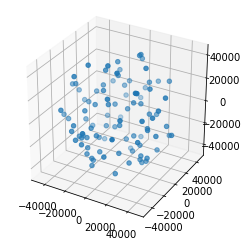

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X,Y,Z)
ax.set_box_aspect([1,1,1])
plt.show()

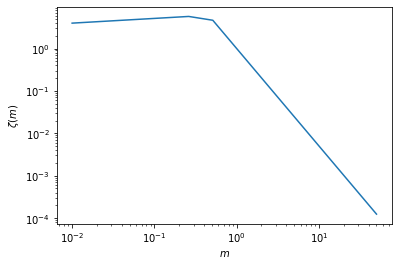

In [40]:
# generating IMFS Chabrier

def Chabrier_IMF(m):
    if m < 1:
        zeta = 0.086*(1/(np.ln(10)*m))*np.exp(-(np.log(m)-np.log(0.22))**2)/(2*0.57**2)
    else:
        zeta = k*m**(-2.3) # not sure what k is
    
def Kroupa_IMF(m):
    zeta = np.zeros(len(m))
    for i in range(0,len(m)):
        if m[i] > 0 and m[i]< 0.08:
            alpha = 0.3
        if m[i] > 0.08 and m[i] < 0.5:
            alpha = 1.3
        if m[i] > 0.5:
            alpha = 2.3
        zeta[i] = m[i]**(-alpha)
    return zeta
m = np.linspace(0.01,50,200)
plt.plot(m,Kroupa_IMF(m))
plt.xscale("log")
plt.yscale("log")
plt.ylabel("$\zeta(m)$")
plt.xlabel("$m$")
plt.show()


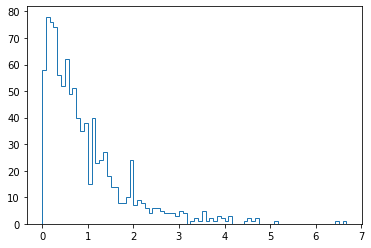

In [42]:
import numpy as np 
import emcee
def Kroupa_IMF(m):
    if m <= 0 :
        return 0
    alpha = 0
    if m > 0 and m < 0.08:
        alpha = 0.3
    if m > 0.08 and m < 0.5:
         alpha = 1.3
    if m > 0.5:
        alpha = 2.3
    return m**(-alpha)
    
ndim = 1
nwalkers = 1000
p0 = np.random.randn(nwalkers,ndim)
sampler = emcee.EnsembleSampler(nwalkers,ndim,Kroupa_IMF)
sampler.run_mcmc(p0,2000)
samples = sampler.get_chain()
plt.hist(abs(samples[0]),80,histtype="step")
#plt.xlim(0,10)
plt.show()

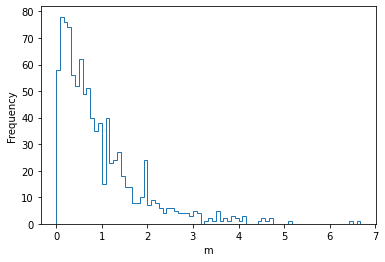

Median: 0.6599219536482154
Mean: 0.9300570898551037
Std: 0.9051210913046368


In [50]:
plt.hist(abs(samples[0]),80,histtype="step")
plt.xlabel('m')
plt.ylabel('Frequency')
plt.show()
print('Median:', np.median(abs(samples[0])))
print('Mean:', np.mean(abs(samples[0])))
print('Std:',np.std(abs(samples[0])))

In [14]:
def cust_dis(x0,x1,size,nControl=1E6):
    sample = []
    nLoop  = 0
    while len(sample)<size and nLoop<nControl:
        x = np.random.uniform(x0,x1)     
        prop = Kroupa_IMF(x)
        assert prop>=0
        if np.random.uniform(0,1) <= prop: #26.67 is max probability 
            sample += [x]
        nLoop+= 1
    return sample
sample = cust_dis(0,10,1000)


(array([129., 107., 118.,  97.,  86., 100.,  70.,  57.,  39.,  22.,  24.,
         19.,  15.,  13.,  11.,   8.,   6.,   4.,   3.,   5.,  11.,   3.,
          5.,   4.,   9.,   3.,   2.,   3.,   1.,   2.,   2.,   5.,   0.,
          2.,   1.,   1.,   2.,   3.,   1.,   1.,   0.,   0.,   2.,   0.,
          0.,   1.,   0.,   2.,   0.,   1.]),
 array([1.68058642e-03, 1.87494517e-01, 3.73308448e-01, 5.59122378e-01,
        7.44936309e-01, 9.30750239e-01, 1.11656417e+00, 1.30237810e+00,
        1.48819203e+00, 1.67400596e+00, 1.85981989e+00, 2.04563382e+00,
        2.23144775e+00, 2.41726168e+00, 2.60307561e+00, 2.78888955e+00,
        2.97470348e+00, 3.16051741e+00, 3.34633134e+00, 3.53214527e+00,
        3.71795920e+00, 3.90377313e+00, 4.08958706e+00, 4.27540099e+00,
        4.46121492e+00, 4.64702885e+00, 4.83284278e+00, 5.01865671e+00,
        5.20447064e+00, 5.39028457e+00, 5.57609850e+00, 5.76191244e+00,
        5.94772637e+00, 6.13354030e+00, 6.31935423e+00, 6.50516816e+00,
        6.

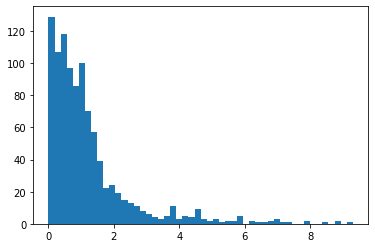

In [15]:
plt.hist(sample,bins= 50)